In [1]:
import mediapipe as mp
import cv2
import time
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Импорт модулей mediapipe, необходимых для извлечения ключевых точек и их прорисовки
mpPose = mp.solutions.pose
pose = mpPose.Pose()
mpDraw = mp.solutions.drawing_utils # Модуль для отрисовки поз
points = mpPose.PoseLandmark # Ключевые точки позы
path_train = "DATASET/TRAIN/" # Путь к датасету
path_test = "DATASET/TEST/" # Путь к датасету

I0000 00:00:1743693140.052642  213175 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1743693140.059063  213299 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.2-arch1.2), renderer: AMD Radeon Graphics (radeonsi, renoir, ACO, DRM 3.61, 6.13.8-zen1-1-zen)


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [2]:
Key_Points_MediaPipe = ['Nose', 'RightEyeInnerCorner', 'RightEye', 'RightEyeOuterCorner', 
              'LeftEyeInnerCorner', 'LeftEye', 'LeftEyeOuterCorner',
              'RightEar', 'LeftEar', 'MouthRightCorner', 'MouthLeftCorner', 'RightShoulder', 'LeftShoulder',
              'RightElbow', 'LeftElbow', 'RightWrist', 'LeftWrist', 'RightLittleFinger', 'LeftLittleFinger',
              'RightIndexFinger', 'LeftIndexFinger', 'RightThumb', 'LeftThumb', 
              'RightPelvicThigh', 'LeftPelvicThigh', 'RightKnee', 'LeftKnee', 'RightAnkle', 'LeftAnkle',
              'RightHeel', 'LeftHeel', 'TheIndexFingerOfTheRightFoot', 'TheIndexFingerOfTheLeftFoot'
]

In [3]:
 # Создание пустого датафрейма для последующего сохраниения ключевых точек
def init_data(Key_Points):
    data = []
    data.append("FileName")
    i = 0
    for p in points:
        x = Key_Points[i]
        data.append(x + "_x")
        data.append(x + "_y")
        data.append(x + "_z")
        data.append(x + "_vis")
        i += 1
    data.append("target")
    #data.append("name_file")
    data = pd.DataFrame(columns = data) 
    return data

In [4]:
# Создание датасета каркасных моделей (набора ключевых точек и метки - названия позы)
def create_df_pos(path, name_file):
    data = init_data(Key_Points_MediaPipe)
    count = 0
    target = []
    for dr in os.listdir(path): # Перебор папок с видами поз
        for image in os.listdir(path+"/"+dr): # Перебор файлов в каждой папке
            temp = []
            img = cv2.imread(path+"/"+dr + "/" + image)
            # Копирование и конвертация изображения в RGB
            imageWidth, imageHeight = img.shape[:2]
            imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Преобразование BGR модели OpenCV в RGB модель, с которой работает MediaPipe
            # Обнаружение позы            
            results = pose.process(imgRGB) # Построение скелетной модели
            if results.pose_landmarks: # Если модель построена
                landmarks = results.pose_landmarks.landmark # Извлечение ключевых точек (ориентиров)
                temp = temp + [path + dr + "/" + image]
                for i,j in zip(points,landmarks):
                    temp = temp + [j.x, j.y, j.z, j.visibility] # Добавление ключевых точек
                temp = temp + [dr] # Добавление метки
                data.loc[count] = temp # Запись в дата фрейм
                count +=1
    data.to_csv(name_file) # Запись датафрейма ключевых точек в файл
    return data

In [5]:
# Построение диаграммы распределения скелетных моделей по классам
def paint_bar(data, s):
    df = data['target'].value_counts()
    label = list(df.index)
    counts = list(df.values)
    # Построение диаграммы распределения
    plt.bar(label, counts)
    plt.title('Распределение классов поз в ' + s + ' наборе')

In [6]:
# Построение датафрейма скелетных моделей обучающего набора
data_tr = create_df_pos(path_train, 'dataset_train_mediapipe.csv')
data_tr.head()

W0000 00:00:1743693140.120385  213280 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743693140.151211  213279 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743693140.181039  213280 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
Corrupt JPEG data: premature end of data segment
Premature end of JPEG file


,FileName,Nose_x,Nose_y,Nose_z,Nose_vis,RightEyeInnerCorner_x,RightEyeInnerCorner_y,RightEyeInnerCorner_z,RightEyeInnerCorner_vis,RightEye_x,...,LeftHeel_vis,TheIndexFingerOfTheRightFoot_x,TheIndexFingerOfTheRightFoot_y,TheIndexFingerOfTheRightFoot_z,TheIndexFingerOfTheRightFoot_vis,TheIndexFingerOfTheLeftFoot_x,TheIndexFingerOfTheLeftFoot_y,TheIndexFingerOfTheLeftFoot_z,TheIndexFingerOfTheLeftFoot_vis,target
0,DATASET/TRAIN/goddess/00000112.jpg,0.493766,0.222121,-0.223330,0.999616,0.496200,0.210179,-0.202032,0.999129,0.499173,...,0.983290,0.807848,0.861208,-0.035976,0.938742,0.196012,0.866063,-0.004116,0.959462,goddess
1,DATASET/TRAIN/goddess/00000190.jpg,0.505053,0.566703,-0.518466,0.998696,0.515230,0.567998,-0.574257,0.997884,0.521436,...,0.956522,0.836904,0.878963,-0.379120,0.932754,0.255068,0.849323,-0.226658,0.936696,goddess
2,DATASET/TRAIN/goddess/00000348.jpg,0.533278,0.219218,-0.898180,0.998825,0.540201,0.198287,-0.838012,0.998093,0.546034,...,0.958689,0.870732,0.928253,-0.195051,0.933501,0.081815,0.972582,-0.194527,0.939802,goddess
3,DATASET/TRAIN/goddess/00000115.jpg,0.461544,0.321562,-0.646598,0.998903,0.471953,0.311228,-0.609937,0.998198,0.480205,...,0.956468,0.742926,0.911795,-0.137962,0.935685,0.153500,0.919718,-0.142365,0.942306,goddess
4,DATASET/TRAIN/goddess/00000358.jpg,0.501235,0.425915,0.057085,0.995773,0.509250,0.406790,0.076684,0.996147,0.512528,...,0.952730,0.679483,0.919478,0.467129,0.934900,0.332570,0.902056,0.376015,0.938645,goddess


<class 'pandas.core.frame.DataFrame'>
Index: 969 entries, 0 to 968
Columns: 134 entries, FileName to target
dtypes: float64(132), object(2)
memory usage: 1022.0+ KB
None
target
warrior2    232
plank       230
downdog     195
goddess     166
tree        146
Name: count, dtype: int64


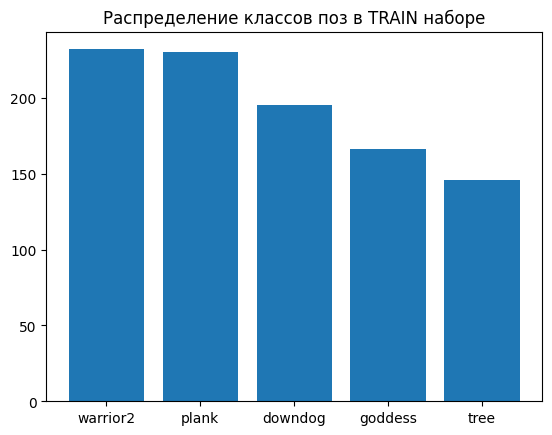

In [7]:
# Вывод характеристик датафрейма скелетных моделей обучающего набора
print(data_tr.info())
print(data_tr['target'].value_counts())
paint_bar(data_tr, 'TRAIN')
# Отображение гистограммы
plt.show()

In [8]:
# Построение датафрейма скелетных моделей тестового набора
data_te = create_df_pos(path_test, 'dataset_test_mediapipe.csv')
data_te.head()

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


,FileName,Nose_x,Nose_y,Nose_z,Nose_vis,RightEyeInnerCorner_x,RightEyeInnerCorner_y,RightEyeInnerCorner_z,RightEyeInnerCorner_vis,RightEye_x,...,LeftHeel_vis,TheIndexFingerOfTheRightFoot_x,TheIndexFingerOfTheRightFoot_y,TheIndexFingerOfTheRightFoot_z,TheIndexFingerOfTheRightFoot_vis,TheIndexFingerOfTheLeftFoot_x,TheIndexFingerOfTheLeftFoot_y,TheIndexFingerOfTheLeftFoot_z,TheIndexFingerOfTheLeftFoot_vis,target
0,DATASET/TEST/goddess/00000016.jpg,0.356858,0.713435,-0.584048,0.821306,0.392314,0.673012,-0.590765,0.821232,0.403592,...,0.552135,0.687782,2.253654,0.777211,0.606801,0.662357,2.128037,0.628609,0.553268,goddess
1,DATASET/TEST/goddess/00000057.jpg,0.151072,0.509166,-0.954450,0.748662,0.159831,0.451362,-1.012178,0.752993,0.162652,...,0.507295,0.372376,0.646372,2.208905,0.562234,0.470702,0.681306,2.435912,0.507894,goddess
2,DATASET/TEST/goddess/00000036.jpg,-0.197921,0.888486,-0.668436,0.713974,-0.173013,0.830324,-0.699560,0.726265,-0.160213,...,0.459367,-0.111461,1.151745,1.118730,0.510246,-0.093827,1.137576,1.200022,0.460371,goddess
3,DATASET/TEST/goddess/00000088.jpg,-0.390627,1.017497,-0.301015,0.705683,-0.389838,0.905940,-0.354410,0.718866,-0.378102,...,0.416909,0.066898,2.158196,1.474962,0.464243,0.132501,2.000463,1.571508,0.416922,goddess
4,DATASET/TEST/goddess/00000050.jpg,-0.856075,0.760729,-1.007424,0.692573,-0.807522,0.651447,-1.095666,0.709389,-0.789692,...,0.376096,-0.428691,2.692314,1.967937,0.420024,-0.433691,2.693499,3.115870,0.376512,goddess


<class 'pandas.core.frame.DataFrame'>
Index: 429 entries, 0 to 428
Columns: 134 entries, FileName to target
dtypes: float64(132), object(2)
memory usage: 452.5+ KB
None
target
warrior2    105
plank        97
downdog      88
goddess      76
tree         63
Name: count, dtype: int64


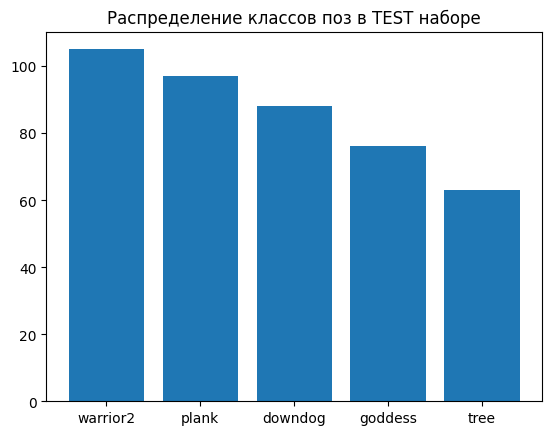

In [9]:
# Вывод характеристик датафрейма скелетных моделей тестового набора
print(data_te.info())
print(data_te['target'].value_counts())
paint_bar(data_te, 'TEST')
# Отображение гистограммы
plt.show()

In [10]:
# Создание наборов данных
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import mediapipe as mp
import cv2
import time
import numpy as np
import pandas as pd
import os

# Загрузка и создание обучающего набора
data_train = pd.read_csv("dataset_train_mediapipe.csv")
X_train = data_train.iloc[:, 2:134]
Y_train = data_train['target']

# Загрузка и создание обучающего набора
data_test = pd.read_csv("dataset_test_mediapipe.csv")
X_test = data_test.iloc[:, 2:134]
Y_test = data_test['target']


kernel = poly
              precision    recall  f1-score   support

     goddess       0.92      0.78      0.85        88
     downdog       0.61      0.68      0.65        76
       plank       0.80      0.93      0.86        97
    warrior2       0.77      0.78      0.77        63
        tree       0.80      0.70      0.75       105

    accuracy                           0.78       429
   macro avg       0.78      0.78      0.77       429
weighted avg       0.79      0.78      0.78       429



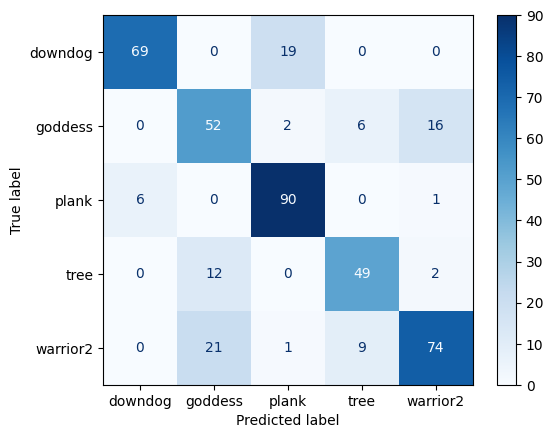


kernel = rbf
              precision    recall  f1-score   support

     goddess       0.93      0.80      0.86        88
     downdog       0.59      0.63      0.61        76
       plank       0.76      0.93      0.84        97
    warrior2       0.86      0.76      0.81        63
        tree       0.77      0.71      0.74       105

    accuracy                           0.77       429
   macro avg       0.78      0.77      0.77       429
weighted avg       0.78      0.77      0.77       429



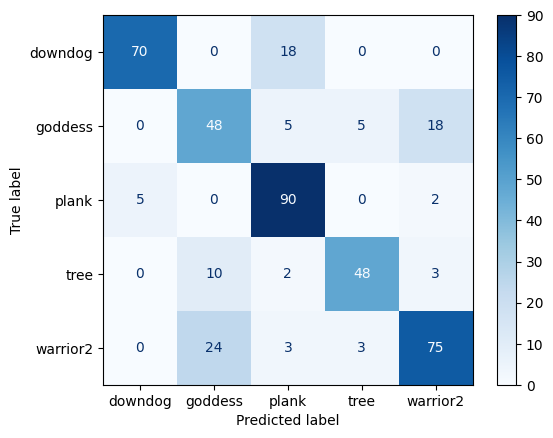


kernel = sigmoid
              precision    recall  f1-score   support

     goddess       0.46      0.31      0.37        88
     downdog       0.33      0.01      0.03        76
       plank       0.40      0.55      0.46        97
    warrior2       0.30      0.10      0.14        63
        tree       0.42      0.85      0.56       105

    accuracy                           0.41       429
   macro avg       0.38      0.36      0.31       429
weighted avg       0.39      0.41      0.34       429



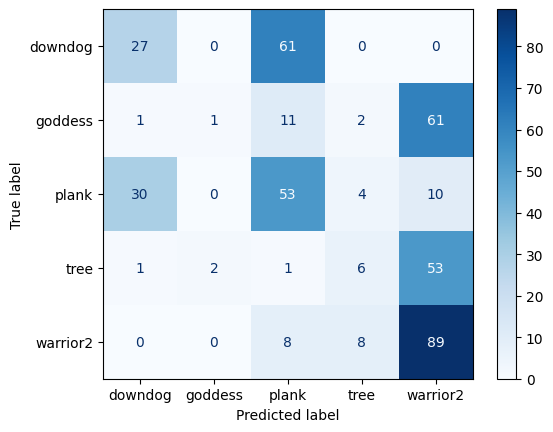

In [11]:
# Исследование классификатора на основе метода опорных векторов
from sklearn.metrics import classification_report
# Создание массива меток (классов поз)
label = []
for i in Y_test:
    if not(i in label):
        label.append(i)

# Классификатор с полиномиальным ядром
print('\nkernel = poly')
modelSVC = SVC(kernel = 'poly')
modelSVC.fit(X_train,Y_train)
# Оценка качества построенного классификатора на тестовом наборе
report = classification_report(Y_test, modelSVC.predict(X_test), target_names=label) 
print(report)
predictions = modelSVC.predict(X_test)
cm = confusion_matrix(Y_test, predictions, labels=modelSVC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelSVC.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Классификатор с радиальным ядром
print('\nkernel = rbf')
modelSVC = SVC(kernel = 'rbf')
modelSVC.fit(X_train,Y_train)
# Оценка качества построенного классификатора на тестовом наборе
report = classification_report(Y_test, modelSVC.predict(X_test), target_names=label)
print(report)
predictions = modelSVC.predict(X_test)
cm = confusion_matrix(Y_test, predictions, labels=modelSVC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelSVC.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Классификатор с сигмоидальным ядром
print('\nkernel = sigmoid')
modelSVC = SVC(kernel = 'sigmoid')
modelSVC.fit(X_train,Y_train)
# Оценка качества построенного классификатора на тестовом наборе
report = classification_report(Y_test, modelSVC.predict(X_test), target_names=label)
print(report)
predictions = modelSVC.predict(X_test)
cm = confusion_matrix(Y_test, predictions, labels=modelSVC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelSVC.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [12]:
print(cv2.__version__)

4.10.0


I0000 00:00:1743701340.016749  213175 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1743701340.018841  217994 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.2-arch1.2), renderer: AMD Radeon Graphics (radeonsi, renoir, ACO, DRM 3.61, 6.13.8-zen1-1-zen)
W0000 00:00:1743701340.063481  217981 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743701340.090590  217987 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Эталонное название позы -  goddess


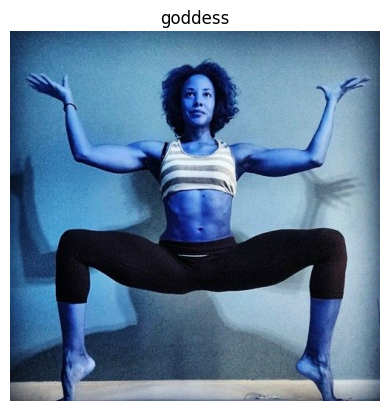

In [ ]:
model = SVC(kernel = 'poly') #'poly', 'rbf', 'sigmoid'
model.fit(X_train,Y_train)

# Проверка работы классификатора
# Построение модели ключевых точек
mpPose = mp.solutions.pose
pose = mpPose.Pose()
mpDraw = mp.solutions.drawing_utils
# Загрузка выбранного файла
path = 'DATASET/TRAIN/goddess/00000137.jpg'  #'DATASET/TEST/plank/00000015.jpg'             #'DATASET/TEST/warrior2/00000093.jpg' 'DATASET/TRAIN/goddess/00000137.jpg'
img = cv2.imread(path)
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = pose.process(imgRGB)
temp = []
# Извлечение ключевых точек
if results.pose_landmarks:
    landmarks = results.pose_landmarks.landmark
    for i, j in zip(points,landmarks):
        temp = temp + [j.x, j.y, j.z, j.visibility]
    # Предсказание построенным классификатором класса позы по построенной скелетной модели    
    res = model.predict([temp])
    label_predict = res[0]
    # Вывод результата
    print('Эталонное название позы - ', path.split('/')[2])  
    #cv2.putText(img, label_predict[0], (50,50), cv2.FONT_HERSHEY_SIMPLEX,1,(255, 0, 0),2, cv2.LINE_AA)
    #cv2.imshow("image",img)
    plt.imshow(img)
    plt.title(label_predict)
    plt.axis('off')


In [18]:
# Код для иллюстрации отрисовки построенной скелетной модели
pose_img = pose
def estimPose_img(input_file, pose_img=pose, landmarks_c=(234, 63, 247), connection_c=(117, 249, 77), 
                  thickness=2, circle_r=2, display=False):
    # Чтение и ввод изображения из файла
    input_img = cv2.imread(input_file) if isinstance(input_file, str) else input_file
    
    # Копирование и конвертация изображения в RGB 
    output_img = input_img.copy()
    RGB_img = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)
    
    # Обнаружение позы
    results = pose.process(RGB_img)
    height, width, _ = input_img.shape
    
    # Если ориентиры обнаружены, то их извлечение и масштабирование
    landmarks = None
    if results.pose_landmarks:
        # Построение скелетной модели в выходном файле
        mpDraw.draw_landmarks(output_img, results.pose_landmarks, mpPose.POSE_CONNECTIONS, 
                                  mpDraw.DrawingSpec(color=landmarks_c, thickness=thickness, circle_radius=circle_r),
                                  mpDraw.DrawingSpec(color=connection_c, thickness=thickness, circle_radius=circle_r))
        
        # Извлечение ориентиров и сопоставление с абсолютными координатами, связанными с размером изображения
        landmarks = [[lmk.x * width, lmk.y * height, lmk.z * width] for lmk in results.pose_landmarks.landmark]

    # Отображение изображений
    if display:
        plt.figure(figsize=[15,15])
        plt.subplot(121); plt.imshow(input_img[:,:,::-1]); plt.title("Исходное изображение"); plt.axis('off')
        plt.subplot(122); plt.imshow(output_img[:,:,::-1]); plt.title("Изображение с отображением скелетной модели позы"); plt.axis('off')
        mpDraw.plot_landmarks(results.pose_landmarks, mpPose.POSE_CONNECTIONS)
    
    return output_img, landmarks # Выходное изображение и ориентиры

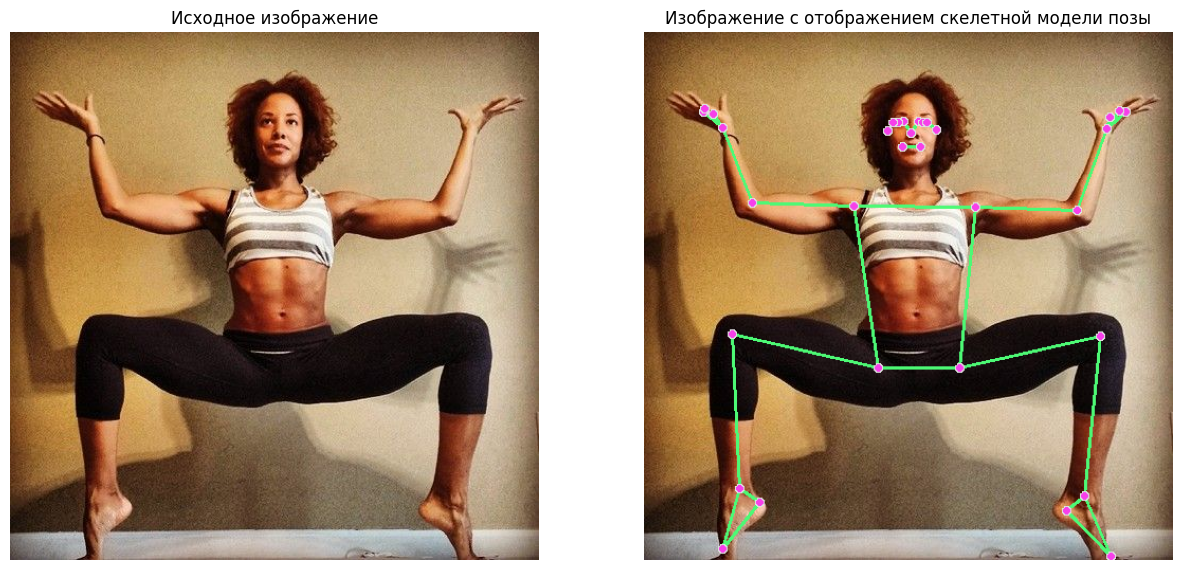

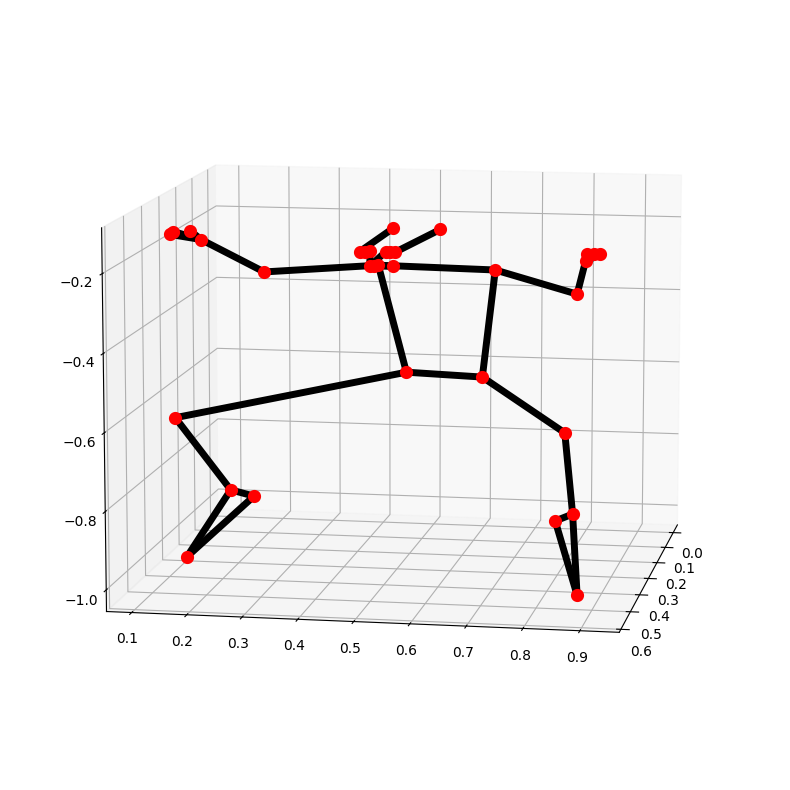

[[252.49379873275757, 96.16907685995102, -259.9244713783264], [259.45958495140076, 85.81759035587311, -230.03794252872467], [263.60148191452026, 86.02672815322876, -229.9988716840744], [267.94400811195374, 86.0951691865921, -230.16054928302765], [245.56513130664825, 85.89096367359161, -230.35600781440735], [240.43431878089905, 86.12281084060669, -230.38692772388458], [235.98772287368774, 86.47460490465164, -230.2929162979126], [276.64920687675476, 93.63667666912079, -90.23216366767883], [230.78922927379608, 94.887875020504, -85.87906509637833], [261.46742701530457, 109.74490642547607, -211.11494302749634], [244.03835833072662, 109.58539694547653, -210.33380925655365], [313.89108300209045, 166.1464422941208, -19.835742190480232], [198.7408995628357, 165.45654833316803, -13.676108792424202], [409.0691804885864, 169.5418357849121, -108.78268629312515], [102.71623730659485, 162.34123706817627, -70.0078159570694], [437.62439489364624, 92.71712601184845, -225.52616894245148], [74.45216178894

In [ ]:
# confirm dataset 1 is properly annotated
img, landmarks = estimPose_img('DATASET/TRAIN/goddess/00000137.jpg', display=True) # 'DATASET/TRAIN/tree/00000095.jpg'

print(landmarks)